In [11]:
import pandas as pd

## Data Import and first Inspection

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. __Import__ the housing dataset (housing.csv) and __inspect__!

In [12]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
list(df)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()
df.total_bedrooms.isna().sum()
df[df.duplicated()]
df.describe()
df.ocean_proximity.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

3. __Add__ the additional Feature __"rooms_per_household"__ (should be self-explanatory)

In [16]:
df['rooms_per_household'] = df.total_rooms.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


4. __Add__ the additional Feature __"population_per_household"__ (should be self-explanatory)

In [17]:
df['population_per_household'] = df.population.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209


5. __Add__ the additional Feature __"bedrooms_per_household"__ (should be self-explanatory)

In [18]:
df['bedrooms_per_household'] = df.total_bedrooms.div(df.households)

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,1.133333
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,1.315789
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,1.120092
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,1.171920


## Which Factors influence House Prices?

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

7. __Create__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis.

8. __Create__ the following __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

<Axes: >

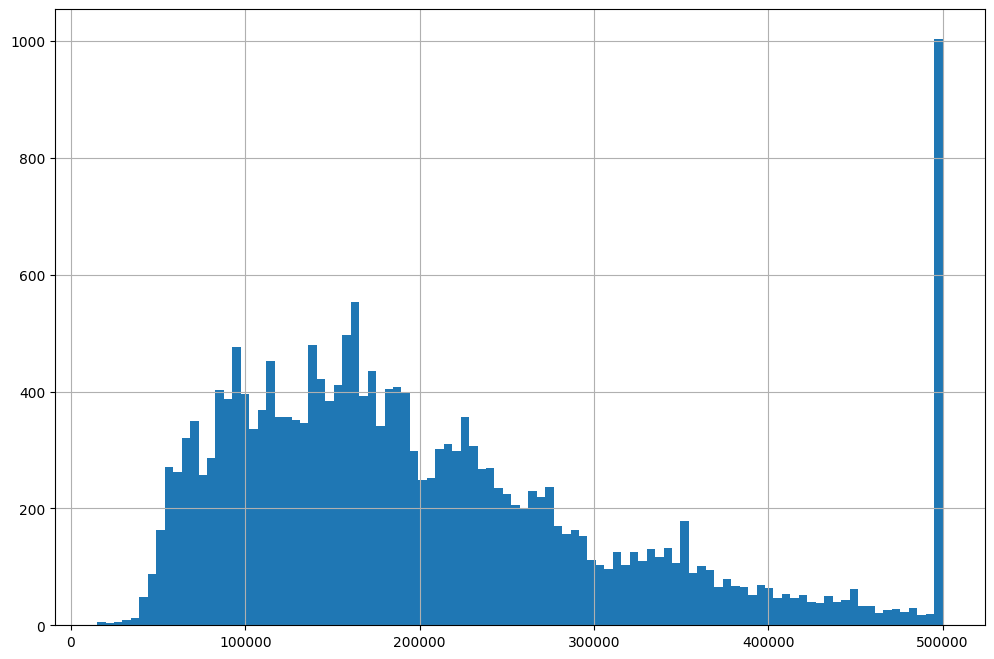

In [20]:
df.median_house_value.hist(bins = 100, figsize=(12, 8))

# Bins are the buckets that your histogram will be grouped by.
#  On the back end, Pandas will group your data into bins, or buckets. 
# Then pandas will count how many values fell into that bucket, and plot the result.

In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.027307,0.002304,0.013402
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.106423,0.002522,0.070025
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.153031,0.013258,-0.077918
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.133482,-0.024596,0.029373
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,-0.028355,0.045887
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.071898,0.070062,-0.066510
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.080165,-0.027336,-0.055158
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.325307,0.018894,-0.062299
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.151344,-0.023639,-0.046739
rooms_per_household,-0.027307,0.106423,-0.153031,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,1.000000,-0.004873,0.848616


In [25]:
df.corr().median_house_value.sort_values(ascending= False)

<ipython-input-25-ff17c9c0e351>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().median_house_value.sort_values(ascending= False)


median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
bedrooms_per_household     -0.046739
latitude                   -0.144638
Name: median_house_value, dtype: float64

<Axes: >

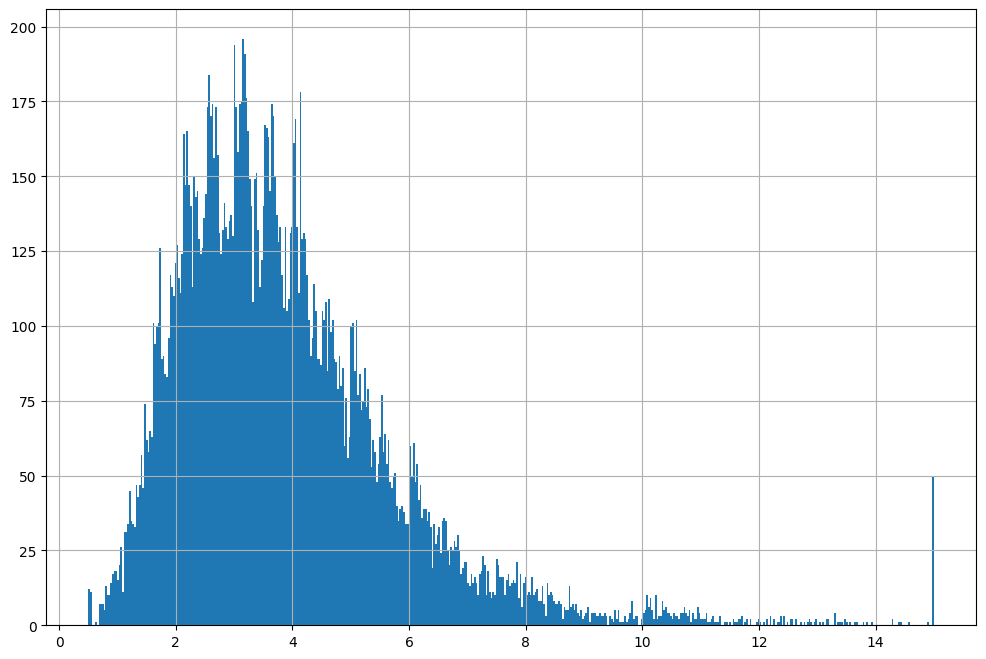

In [39]:
df.median_income.hist(bins=500, figsize=(12, 8))

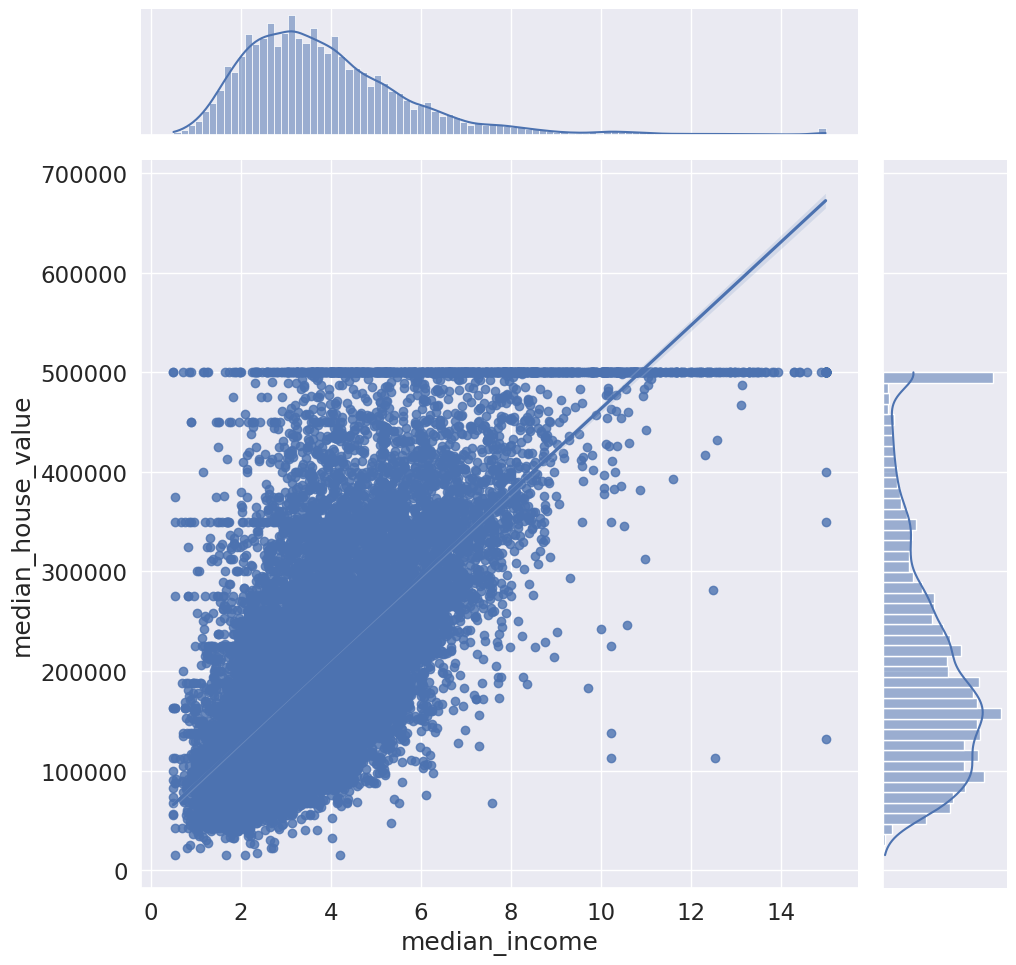

In [40]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='reg', height=10)
plt.show()

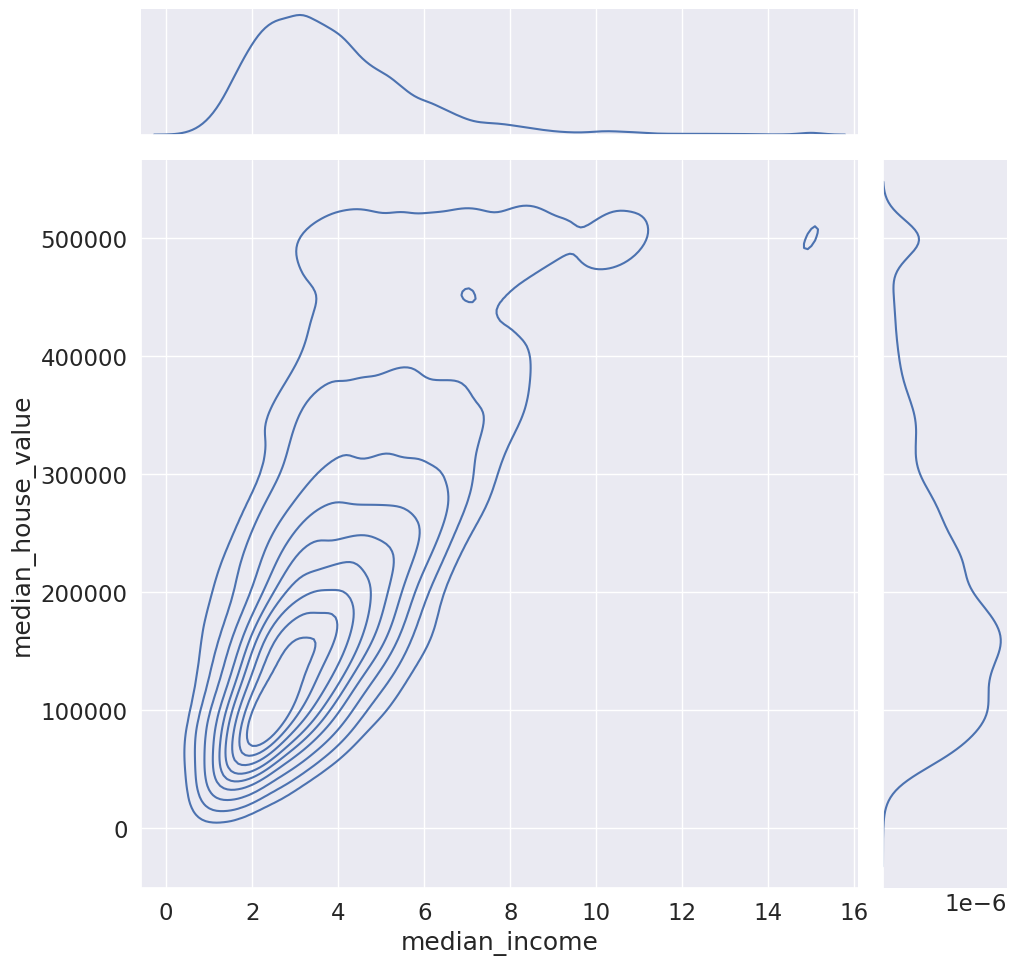

In [41]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='kde', height=10)
plt.show()

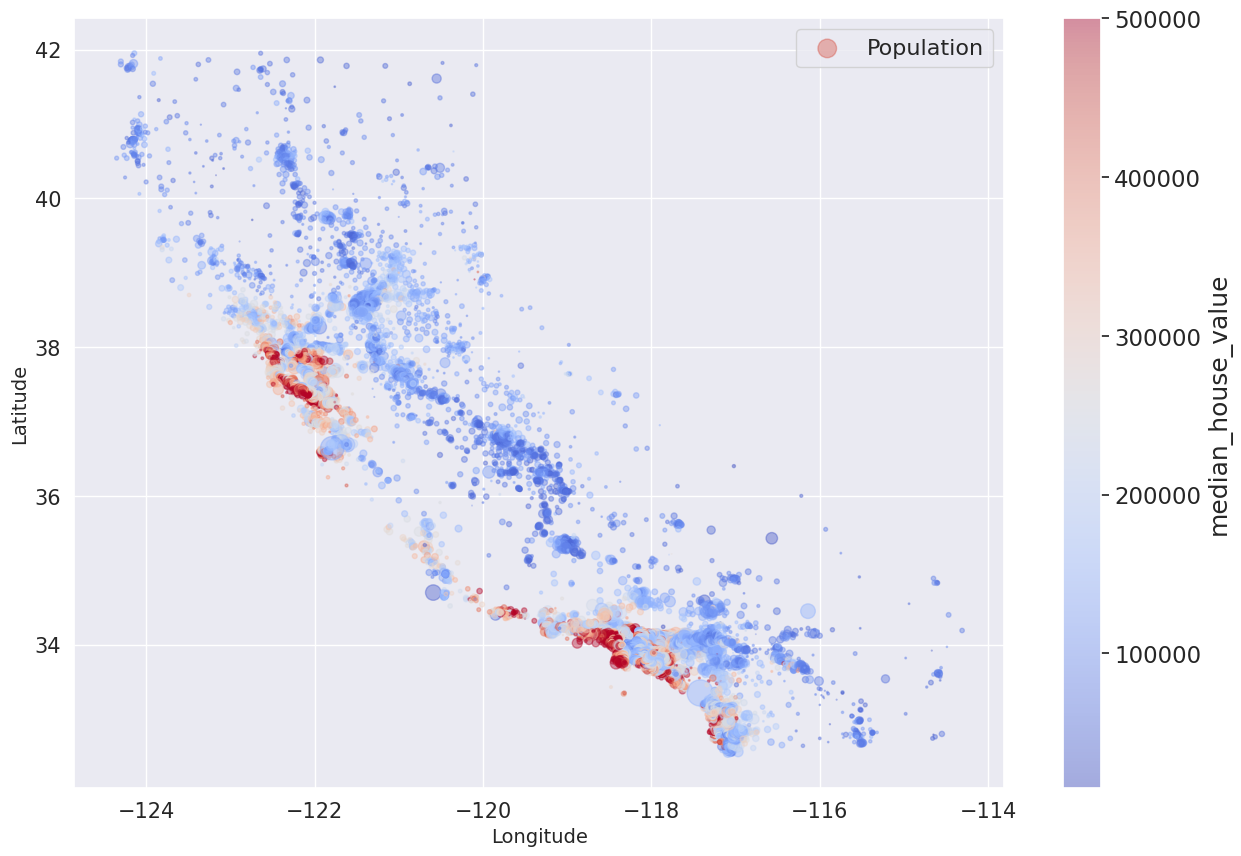

In [51]:
df.plot(kind='scatter', x='longitude', y='latitude',
         s=df.population/100, label='Population', figsize=(15,10),
         c='median_house_value', cmap='coolwarm',
         colorbar=True, alpha=0.4, fontsize=15, sharex=False)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14) 
plt.legend(fontsize=16)
plt.show()

9. Does this look familiar to you? It´s California. Let´s __add the map__ of California saved in __california.png__.

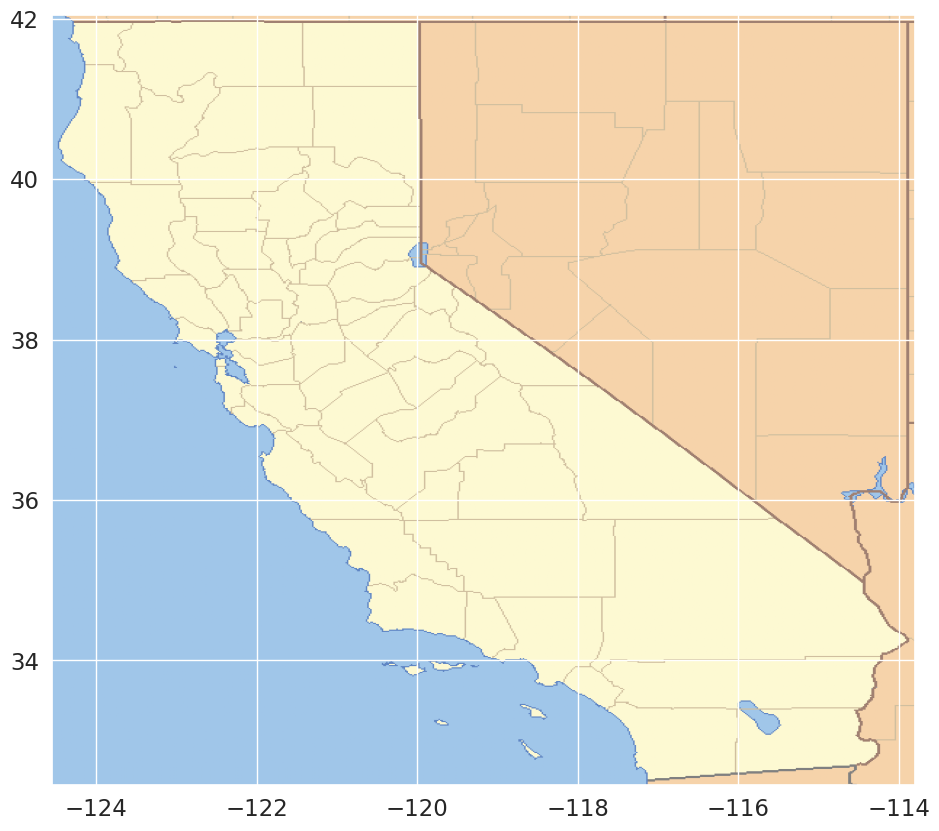

In [52]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

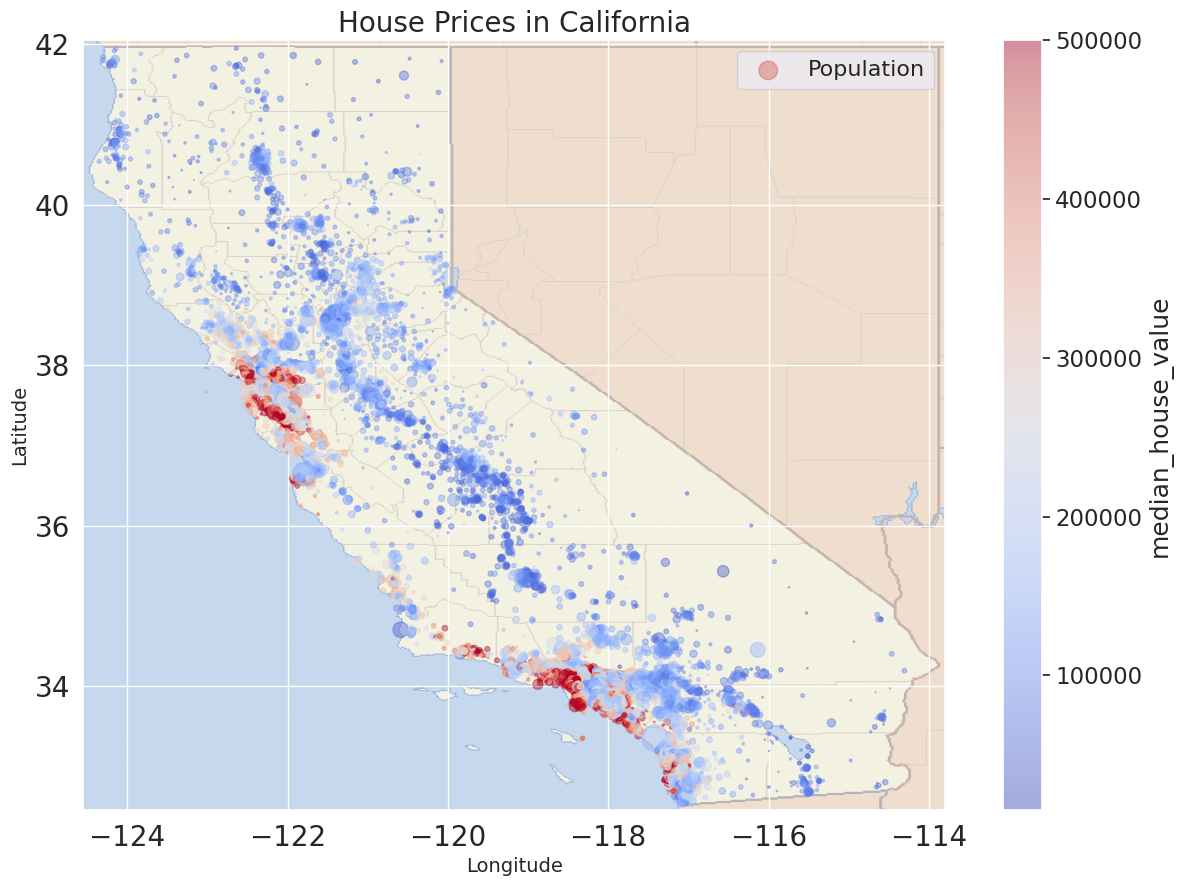

In [53]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("House Prices in California", fontsize = 20)
plt.legend(fontsize=16)
plt.show()

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [77]:
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] <
                                           (4.744, 7.3] < (7.3, 15.0]]

In [78]:
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"])

In [79]:
df.income_cat

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very High']

In [80]:
df.income_cat.value_counts(normalize = True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: income_cat, dtype: float64

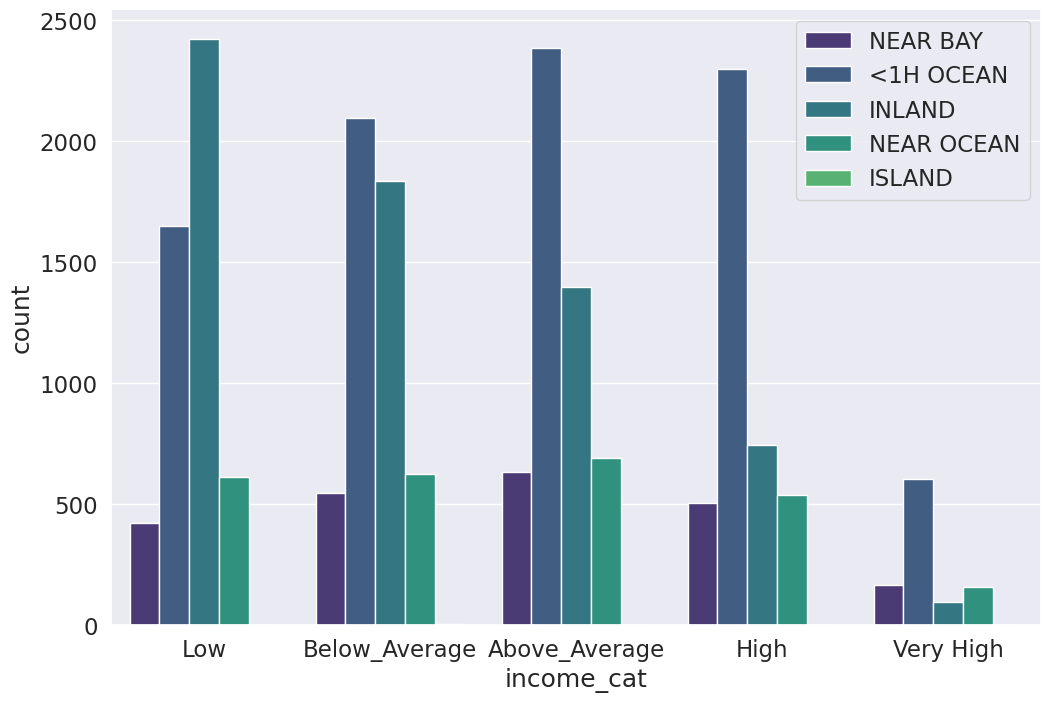

In [83]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

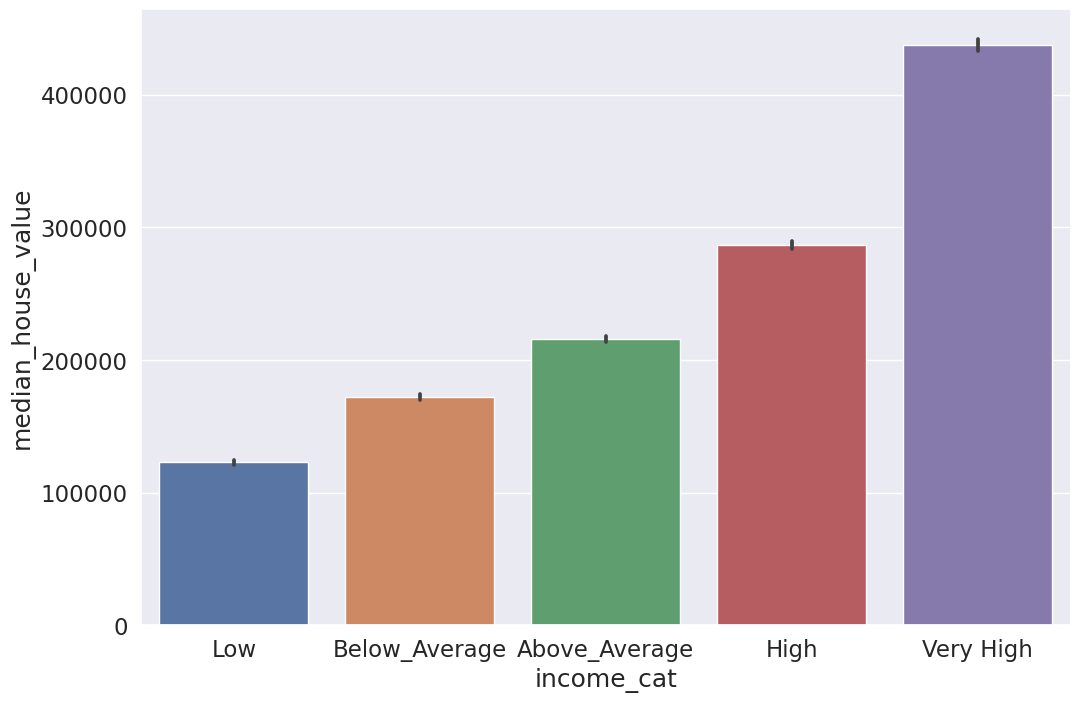

In [85]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_cat", y = "median_house_value")
plt.show()

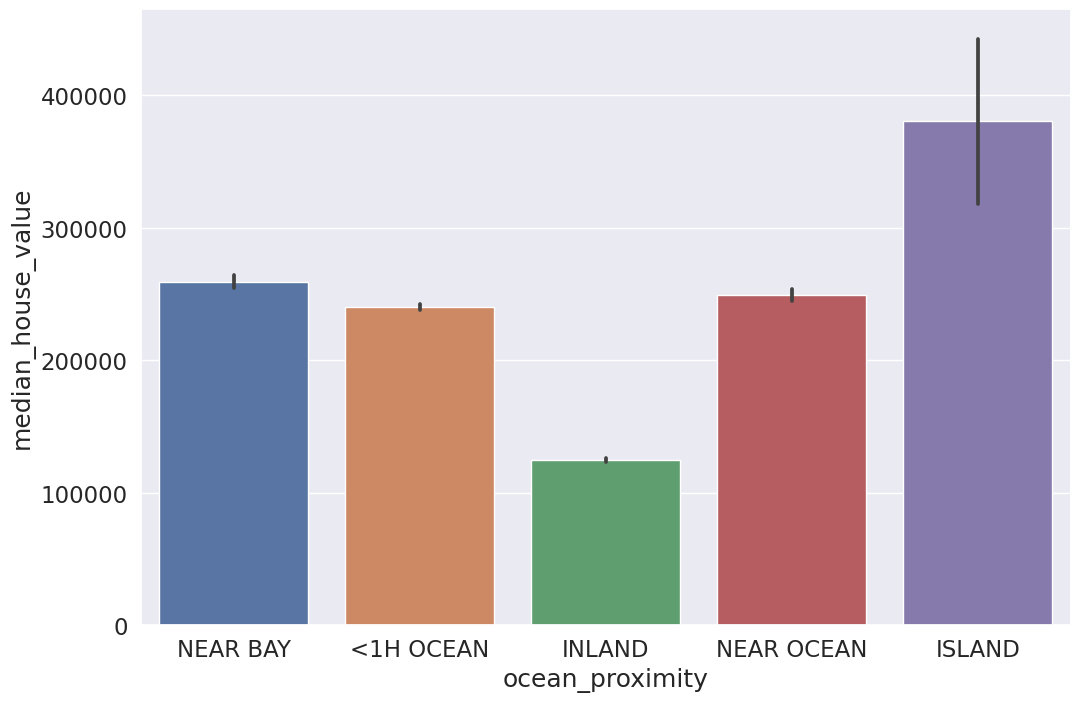

In [86]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

In [94]:
matrix=df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns='ISLAND')

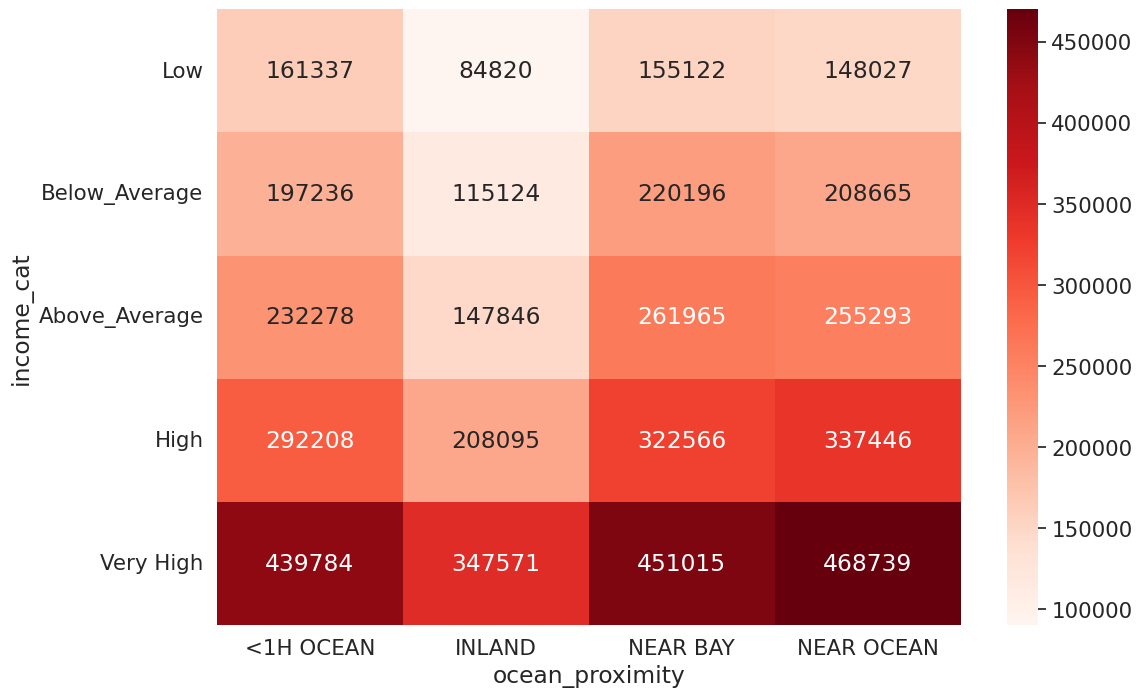

In [101]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()